In [52]:
import jax.numpy as jnp
from jax import jit,grad,hessian,jacfwd
from jax.config import config
config.update("jax_enable_x64", True)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.special import factorial

import jax


In [63]:
def get_matern_five_half(rho):
    def k(x,y):
        d=jnp.sqrt(jnp.sum((x-y)**2))
        return (1+jnp.sqrt(5)*d/rho+jnp.sqrt(5)*d**2/(rho**2))*jnp.exp(-jnp.sqrt(5)*d/rho)
    return k

def get_gaussianRBF(gamma):
    def f(x,y):
        return jnp.exp(-jnp.sum((x-y)**2)/gamma)
    return f

def div(f,arg_num=0):
    jac=jacfwd(f,argnums=arg_num)
    def divergence(x,y):
        return jnp.trace(jac(x,y))
    return divergence

def k_laplacian(f,arg_num=0):
    return div(grad(f,argnums=arg_num),arg_num=arg_num)

def laplacian(f,arg_num=0):
    hess= hessian(f,argnums=arg_num)
    def lap(x):
        return jnp.trace(hess(x))
    return lap


In [30]:
k=get_matern_five_half(1)

In [31]:
k_lapx = k_laplacian(k,arg_num=0)
k_laplap = k_laplacian(k_lapx,arg_num=1)


vec_k = jax.jit(jax.vmap(jax.vmap(k, in_axes=(None, 0)), in_axes=(0, None)))
vec_k_lapx = jax.vmap(jax.vmap(k_lapx, in_axes=(None, 0)), in_axes=(0, None))
vec_k_laplap = jax.vmap(jax.vmap(k_laplap, in_axes=(None, 0)), in_axes=(0, None))


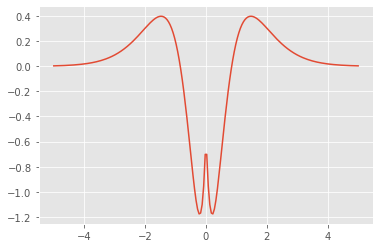

In [49]:
xgrid=jnp.linspace(-5,5,200)

plt.plot(xgrid,vec_k_lapx(jnp.array([[0.]]),xgrid.reshape(-1,1)).flatten())

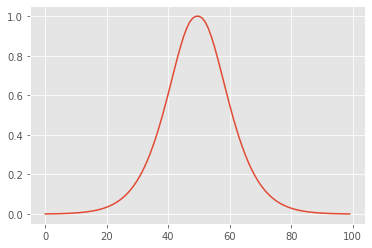

In [33]:
plt.plot(vec_k(jnp.array([0]),xgrid).flatten())

In [41]:
k_laplacian(k)(jnp.array([0,1.]),jnp.array([2.,1]))

Array(0.18306681, dtype=float64)

In [54]:
def matern(p,rho):
    f=factorial(p)/factorial(2*p)
    C=jnp.sqrt(2*p+1)/rho

    def k(x,y):
        d=jnp.sqrt(jnp.sum((x-y)**2))
        exp_part=jnp.exp(-C*d)
        poly_part=0
        for i in range(p+1):
            coef=factorial(p+i)/(factorial(i)*factorial(p-i))
            power=(2*C*d)**(p-i)
            poly_part += coef*power
        return exp_part*poly_part*f
    return k


In [81]:
k=matern(50,0.1)
k=get_gaussianRBF(0.1)
k_lapx = k_laplacian(k,arg_num=0)
k_laplap = k_laplacian(k_lapx,arg_num=1)


vec_k = jax.jit(jax.vmap(jax.vmap(k, in_axes=(None, 0)), in_axes=(0, None)))
vec_k_lapx = jax.vmap(jax.vmap(k_lapx, in_axes=(None, 0)), in_axes=(0, None))
vec_k_laplap = jax.vmap(jax.vmap(k_laplap, in_axes=(None, 0)), in_axes=(0, None))


In [83]:
k=get_gaussianRBF(0.1)
k_lapx = k_laplacian(k,arg_num=0)
k_laplap = k_laplacian(k_lapx,arg_num=1)


vec_k = jax.jit(jax.vmap(jax.vmap(k, in_axes=(None, 0)), in_axes=(0, None)))
vec_k_lapx = jax.vmap(jax.vmap(k_lapx, in_axes=(None, 0)), in_axes=(0, None))
vec_k_laplap = jax.vmap(jax.vmap(k_laplap, in_axes=(None, 0)), in_axes=(0, None))


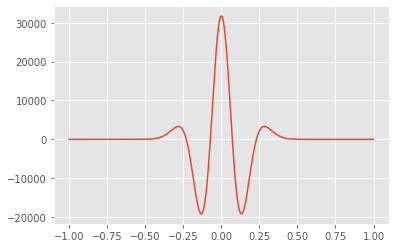

In [82]:
xgrid=jnp.linspace(-1,1,200)

plt.plot(xgrid,vec_k_laplap(jnp.array([[0.]]),xgrid.reshape(-1,1)).flatten())

In [61]:
jnp.max(jnp.abs(vec_k_lapx(jnp.array([[0.]]),xgrid.reshape(-1,1))))

Array(138.77103158, dtype=float64)